# Basic examples

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join("..")))
from ShaderPlay import *

## Basic Image Shader

To create a shader, we shall extend the `ImageShader` and implement the `mainImage` method. `mainImage` takes a parameter `ctx` which has the value of current render frame.

The coordinates, `fragCoord` are in pixel units, ranging from 0.5 to resolution-0.5, over the rendering surface, where the resolution is passed to the shader through the `iResolution` parameter.

100%|██████████████████████████████████████████████████████████████████████████| 65536/65536 [00:09<00:00, 7109.56it/s]


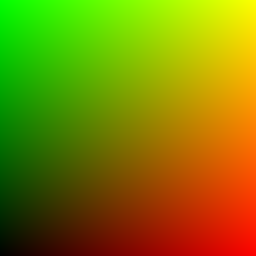

In [2]:
class BasicColor(ImageShader):
    def mainImage(self, ctx):
        uv = ctx.fragCoord / ctx.iResolution
        ctx.fragColor = vec4(uv.xy, 0, 1)

s = BasicColor()
display(render(s))

## Smooth HSV

https://www.shadertoy.com/view/MsS3Wc

This example demos some math functions.

100%|██████████████████████████████████████████████████████████████████████████| 65536/65536 [00:34<00:00, 1880.08it/s]


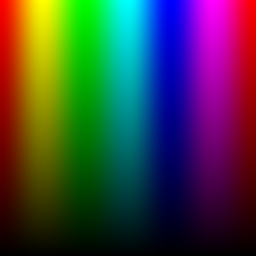

In [3]:
class SmoothHSV(ImageShader):
    # Official HSV to RGB conversion
    def hsv2rgb(self, c):
        rgb = clamp(abs(mod(c.x*6+vec3(0, 4, 2), 6)-3)-1, 0, 1)
        return c.z * mix(vec3(1), rgb, c.y)
    
    # Smooth HSV to RGB conversion
    def hsv2rgb_smooth(self, c):
        rgb = clamp(abs(mod(c.x*6+vec3(0, 4, 2), 6)-3)-1, 0, 1)
        rgb = rgb*rgb*(3-2*rgb)
        return c.z*mix(vec3(1, 1, 1), rgb, c.y)

    def mainImage(self, ctx):
        uv = ctx.fragCoord / ctx.iResolution
        hsl = vec3(uv.x, 1, uv.y)
        rgb = self.hsv2rgb_smooth(hsl)
        ctx.fragColor = vec4(rgb, 1)

s = SmoothHSV()
display(render(s))